# Assignment Solution Steps
### 1. Using wbdata api, find the countries with incomelevels HIC,UMC, and MIC
### 2. Choosing the time between 2000 and 2021 because we are interested in recent information
### 3. Find the topics in which we are interested(Education) topic 4 , and Doing business
### 4. Find the indicators we are interested in for our business
### 5. Create a dataframe for our dataset 
### 6. Cleaning our dataframe our data
### 7. Visualizing our data
### 8. Conclusion

In [103]:
!pip install wbdata 
import pandas as pd
import wbdata 
import datetime
%matplotlib inline 
#list of countries with incomelevels HIC,UMC, and MIC
countries = [i['id'] for i in wbdata.get_country(incomelevel=['HIC','UMC','MIC'])]
#listing all topics
topics = wbdata.get_topic()
wbdata.get_source()
#listing indicators for education topic
indicators_for_topic_4 = wbdata.get_indicator(topic = 4)
#listing indicators for doing business topic
wbdata.get_indicator(source=1) 
#choosing indicators that we are interested in
indicators = {"IC.BUS.EASE.XQ":"ease_of_doing_business","BAR.SEC.ICMP.15UP.FE.ZS":"highschool_15up","SP.POP.1524.TO.UN":"pop_betw_15-24"}
#creating the pandas data frame of our dataset
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
df = df.reset_index()
#print(df.info())
#df['date'] = pd.to_datetime(df['date'])
df['country'] = df['country'].astype('string')
#print(df.info())
#Choosing the time between 2015 and 2021 because we are interested in recent information 
df = df[df['date']<= '2021']
df = df[df['date']>= '2000' ]

df = df.set_index('country')
#droping highschool_15up column because it does not provide enough information
df = df[['date','ease_of_doing_business','pop_betw_15-24']]
#df

In [104]:
#find a list of countries which are easy for business
df_ease_doing_business = df[['date','ease_of_doing_business']]
df_ease_doing_business.dropna(inplace=True)
#the information i have is only for the year 2019
#df_ease_doing_business = df_ease_doing_business[df_ease_doing_business['date'] == '2019']
#df_ease_doing_business = df_ease_doing_business['ease_of_doing_business']
df_ease_doing_business.sort_values(by=['ease_of_doing_business'],inplace=True,ascending=False)
df_ease_doing_business.reset_index(inplace=True)
df_ease_doing_business = df_ease_doing_business.groupby("country").mean()
df_ease_doing_business.sort_values(by=['ease_of_doing_business'],inplace=True,ascending=True)
#print(df_ease_doing_business.head(50))
ease_doing_business_countries = df_ease_doing_business.index.tolist()
ease_doing_business_countries
#df_ease_doing_business.tail(10)
#len(ease_doing_business_countries)
#df_ease_doing_business = df_ease_doing_business.groupby("country").mean()

<ipython-input-104-6ba598c69f31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ease_doing_business.dropna(inplace=True)
<ipython-input-104-6ba598c69f31>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ease_doing_business.sort_values(by=['ease_of_doing_business'],inplace=True,ascending=False)


['New Zealand',
 'Singapore',
 'Hong Kong SAR, China',
 'Denmark',
 'Korea, Rep.',
 'United States',
 'Georgia',
 'United Kingdom',
 'Norway',
 'Sweden',
 'Lithuania',
 'Malaysia',
 'Mauritius',
 'Australia',
 'United Arab Emirates',
 'North Macedonia',
 'Estonia',
 'Latvia',
 'Finland',
 'Thailand',
 'Germany',
 'Canada',
 'Ireland',
 'Kazakhstan',
 'Iceland',
 'Austria',
 'Russian Federation',
 'Japan',
 'Spain',
 'China',
 'France',
 'Turkey',
 'Azerbaijan',
 'Israel',
 'Switzerland',
 'Slovenia',
 'Portugal',
 'Poland',
 'Czech Republic',
 'Netherlands',
 'Bahrain',
 'Serbia',
 'Slovak Republic',
 'Belgium',
 'Armenia',
 'Moldova',
 'Belarus',
 'Montenegro',
 'Croatia',
 'Hungary',
 'Morocco',
 'Cyprus',
 'Romania',
 'Kenya',
 'Kosovo',
 'Italy',
 'Chile',
 'Mexico',
 'Bulgaria',
 'Saudi Arabia',
 'India',
 'Ukraine',
 'Puerto Rico',
 'Brunei Darussalam',
 'Colombia',
 'Oman',
 'Uzbekistan',
 'Vietnam',
 'Jamaica',
 'Luxembourg',
 'Indonesia',
 'Costa Rica',
 'Jordan',
 'Peru',
 'Q

                    pop_betw_15-24
country                           
India                 2.186308e+08
China                 2.129569e+08
Indonesia             4.263269e+07
United States         4.252483e+07
Brazil                3.483999e+07
Pakistan              3.441519e+07
Bangladesh            3.098689e+07
Nigeria               2.867749e+07
Russian Federation    2.332921e+07
Mexico                1.947385e+07
Vietnam               1.739581e+07
Iran, Islamic Rep.    1.702105e+07
Philippines           1.687563e+07
Egypt, Arab Rep.      1.490440e+07
Japan                 1.419812e+07
Turkey                1.362090e+07
Thailand              1.011446e+07
South Africa          9.544119e+06
Germany               9.537787e+06
Myanmar               9.280947e+06
['India', 'China', 'Indonesia', 'United States', 'Brazil']
True


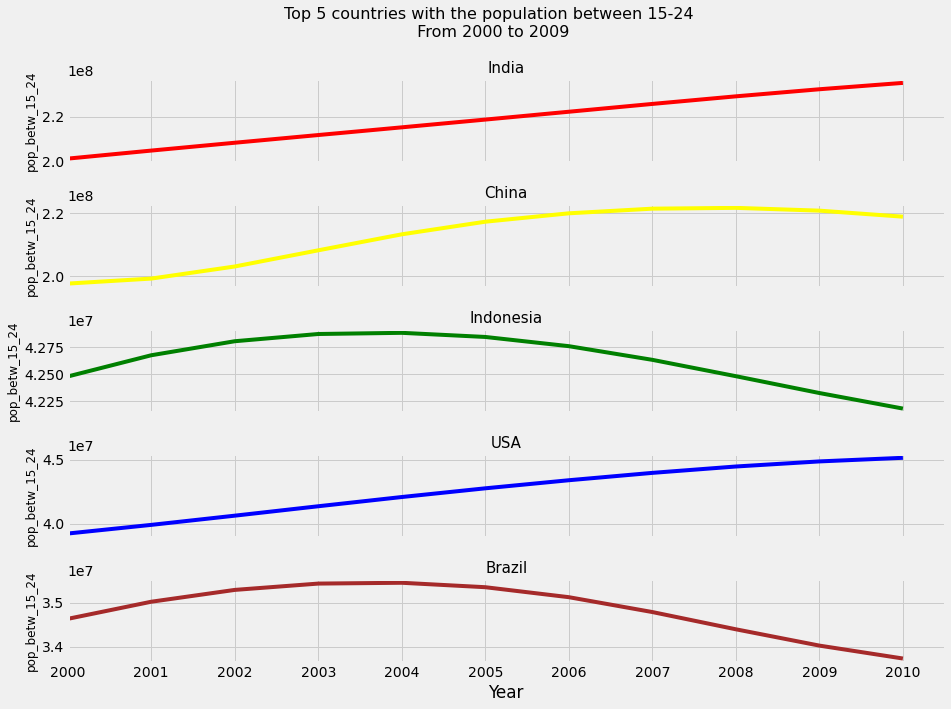

In [105]:
#Using the population of the ages between 15 and 24
import numpy as np
df_pop_betw_15_24 = df[['date','pop_betw_15-24']]
#Selecting the time bwtween the year 2000 and 2010
df_pop_betw_15_24 = df_pop_betw_15_24[df_pop_betw_15_24['date'] >= '2000']
df_pop_betw_15_24 = df_pop_betw_15_24[df_pop_betw_15_24['date'] <= '2010']
df_pop_betw_15_24_mean = df_pop_betw_15_24.groupby("country").mean()

df_pop_betw_15_24_mean.sort_values(by=['pop_betw_15-24'],inplace=True,ascending=False)
print(df_pop_betw_15_24_mean.head(20))
#list of top ten countries in pop_betw_15_24
list_of_countries = df_pop_betw_15_24_mean.index.tolist()
#Checking of the top 5 countries in pop_betw_15_24 are also in the top countries in ease_doing_business_countries
list_of_top5_countries = list_of_countries[:5]
print(list_of_top5_countries)
print(set(list_of_top5_countries).issubset(ease_doing_business_countries))
df_pop_betw_15_24 = df_pop_betw_15_24.reset_index()

#India
df_pop_betw_15_24_India = df_pop_betw_15_24[df_pop_betw_15_24['country'] == 'India']
df_pop_betw_15_24_India = df_pop_betw_15_24_India[['date','pop_betw_15-24']]
df_pop_betw_15_24_India = df_pop_betw_15_24_India.head(11)

#China
df_pop_betw_15_24_China = df_pop_betw_15_24[df_pop_betw_15_24['country'] == 'China']
df_pop_betw_15_24_China = df_pop_betw_15_24_China[['date','pop_betw_15-24']]
df_pop_betw_15_24_China = df_pop_betw_15_24_China.head(11)

#Indonesia
df_pop_betw_15_24_Indonesia = df_pop_betw_15_24[df_pop_betw_15_24['country'] == 'Indonesia']
df_pop_betw_15_24_Indonesia = df_pop_betw_15_24_Indonesia[['date','pop_betw_15-24']]
df_pop_betw_15_24_Indonesia = df_pop_betw_15_24_Indonesia.head(11)

#United States
df_pop_betw_15_24_USA = df_pop_betw_15_24[df_pop_betw_15_24['country'] == 'United States']
df_pop_betw_15_24_USA = df_pop_betw_15_24_USA[['date','pop_betw_15-24']]
df_pop_betw_15_24_USA = df_pop_betw_15_24_USA.head(11)


#Brazil
df_pop_betw_15_24_Brazil = df_pop_betw_15_24[df_pop_betw_15_24['country'] == 'Brazil']
df_pop_betw_15_24_Brazil = df_pop_betw_15_24_Brazil[['date','pop_betw_15-24']]
df_pop_betw_15_24_Brazil = df_pop_betw_15_24_Brazil.head(11)

#merging all dataframes
pop_betw_15_24_df = pd.merge(df_pop_betw_15_24_India, df_pop_betw_15_24_China, on='date')
pop_betw_15_24_df = pd.merge(pop_betw_15_24_df, df_pop_betw_15_24_Indonesia, on='date')
pop_betw_15_24_df = pd.merge(pop_betw_15_24_df, df_pop_betw_15_24_USA, on='date')
pop_betw_15_24_df = pd.merge(pop_betw_15_24_df, df_pop_betw_15_24_Brazil, on='date')

pop_betw_15_24_df.columns = ['date','pop_betw_15_24_India','pop_betw_15_24_China', 'pop_betw_15_24_Indonesia', 'pop_betw_15_24_USA', 'pop_betw_15_24_Brazil']

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
style.use('fivethirtyeight')

fig, axes = plt.subplots(5, figsize=(14, 10), sharex=True)
fig.suptitle('Top 5 countries with the population between 15-24 \n From 2000 to 2009',alpha=2.0, fontsize=16)
plt.setp(axes, xticks=np.arange(0,11,step=1), xticklabels=['2000', '2001', '2002', '2003', '2004', '2005', '2006'
                                                          ,'2007', '2008', '2009', '2010'],
         xlim=[0,10.5], xlabel='Year')
columns = ['pop_betw_15_24_India','pop_betw_15_24_China', 'pop_betw_15_24_Indonesia', 'pop_betw_15_24_USA', 'pop_betw_15_24_Brazil']
titles = ['India','China', 'Indonesia', 'USA', 'Brazil']
colors = ['red', 'Yellow', 'Green', 'Blue', 'brown']
axes1 = axes[0]
axes2 = axes[1]
axes3 = axes[2]
axes4 = axes[3]
axes5 = axes[4]
axes = [axes1,axes2,axes3,axes4,axes5]

plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i in range(len(axes)):
    pop_betw_15_24_df[columns[i]].plot(ax=axes[i], color=colors[i]);
    axes[i].set_title(titles[i],loc='center', fontsize=15);
    axes[i].set_ylabel('pop_betw_15_24', fontsize=12);




 Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 0.0,
 10.5,
 Text(0.5, 0, 'Year')]

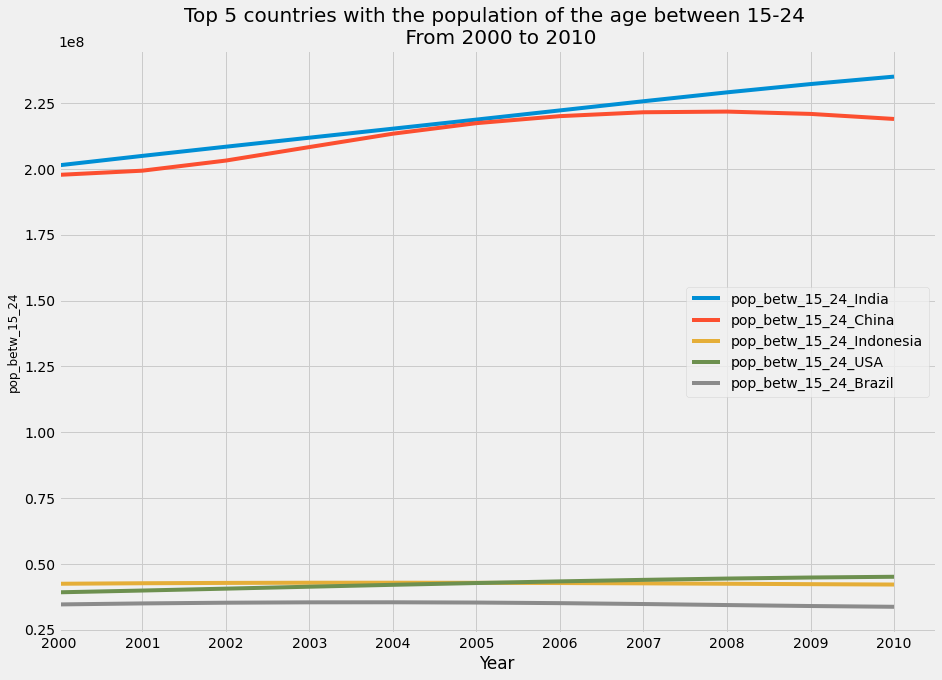

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
ax = pop_betw_15_24_df.plot(figsize=(14,10))
ax.set_ylabel('pop_betw_15_24', fontsize=12)
ax.set_title('Top 5 countries with the population of the age between 15-24 \n From 2000 to 2010',alpha=2.0, fontsize=20)
plt.setp(ax, xticks=np.arange(0,11,step=1), xticklabels=['2000', '2001', '2002', '2003', '2004', '2005', '2006'
                                                          ,'2007', '2008', '2009','2010'],
         xlim=[0,10.5], xlabel='Year')


## Conclusion
###   By analysing our dataset, 
####  1.Which countries have a high customer potential for our services?
       we have found that the top 5 countries in which we can do our education business are:
       India, China , Indonesia, USA and Brazil,
####  2.For each of these countries, what will be the evolution of this customer potential?
       For India the evolution curve is gowing up,
       For China the evolution curve is going down a little
       For Indonesia the evolution curve is going down much
       For USA the evolution curve is going up
       For Brazil the evolution curve is going down much
####  3.In which countries should one set up first?
       The best choice to start with is India